# Chapter 6: Decision Trees

In [1]:
from sklearn.datasets import load_iris

import numpy as np

import pandas as pd

from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

x = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x,y)

DecisionTreeClassifier(max_depth=2)

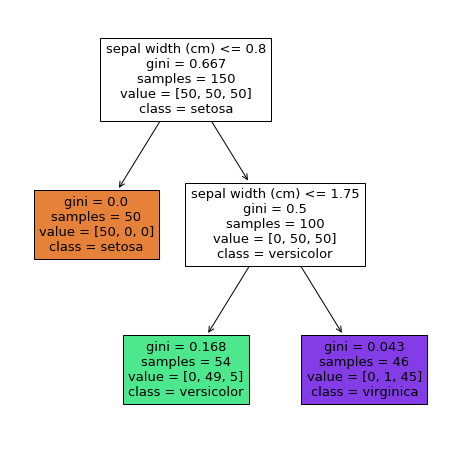

In [2]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(8,8))

arvore = tree.plot_tree(tree_clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)


In [3]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [4]:
tree_clf.predict([[5,1.5]])

array([1])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

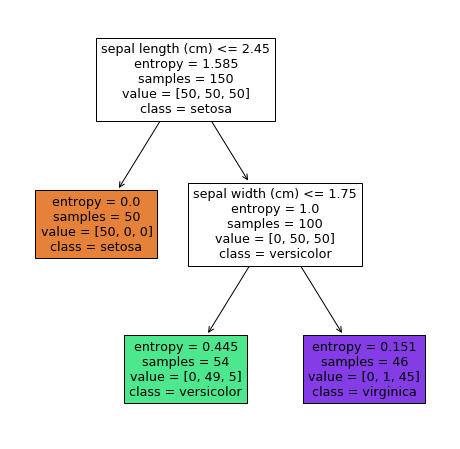

In [7]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree_clf.fit(x,y)

fig = plt.figure(figsize=(8,8))

arvore = tree.plot_tree(tree_clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)


In [8]:
# entropia vs gini: pouca diferença, a entropia tende a produzir árvores mais equilibradas

# coef gini = 1 - sum((values/samples)²)
# entropia = -sum((values/samples)*log(values/samples))

In [9]:
# para regularização, alterar o parâmetro max_depth (profundidade da árvore), todos os parâmetros max e min

In [10]:
from sklearn.tree import DecisionTreeRegressor

x = np.random.rand(100)
y = x*x

xt = x.reshape(-1,1)
yt = y.reshape(-1,1)

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(xt,yt)

DecisionTreeRegressor(max_depth=2)

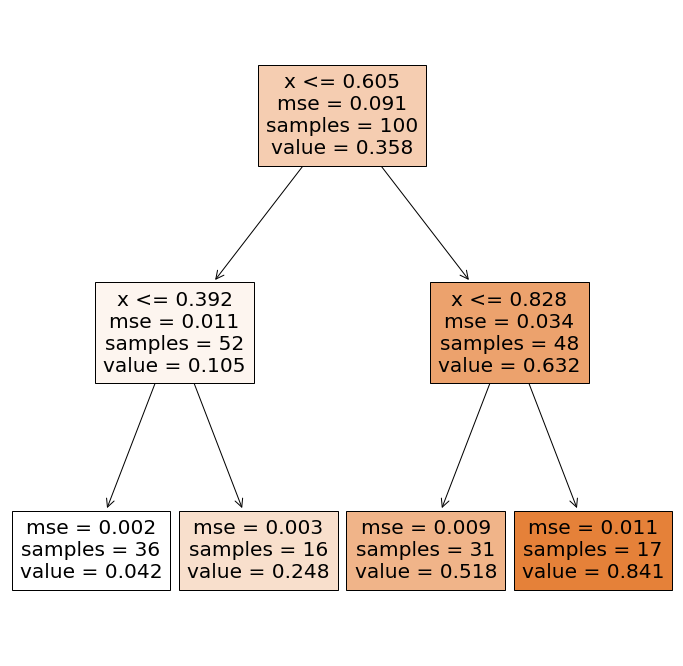

In [11]:
fig = plt.figure(figsize=(12,12))
arvore = tree.plot_tree(tree_reg, 
                   feature_names=['x'],  
                   class_names=['y'],
                   filled=True)

Text(0.5, 1.0, 'produnfidade = 2')

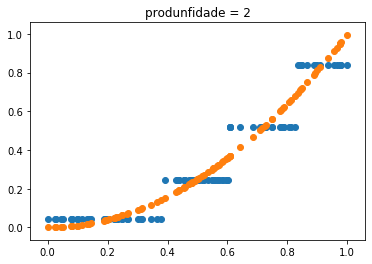

In [12]:
x = np.random.rand(100).reshape(-1,1)

plt.scatter(x, tree_reg.predict(x))

plt.scatter(x, x*x)
plt.title('produnfidade = 2')

Text(0.5, 1.0, 'produnfidade = 4')

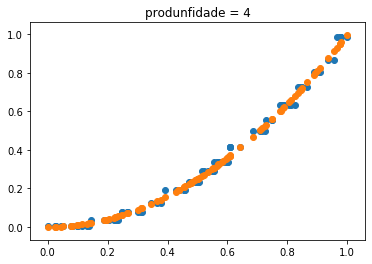

In [13]:
tree_reg = DecisionTreeRegressor(max_depth=4)
tree_reg.fit(xt,yt)

plt.scatter(x, tree_reg.predict(x))

plt.scatter(x, x*x)
plt.title('produnfidade = 4')

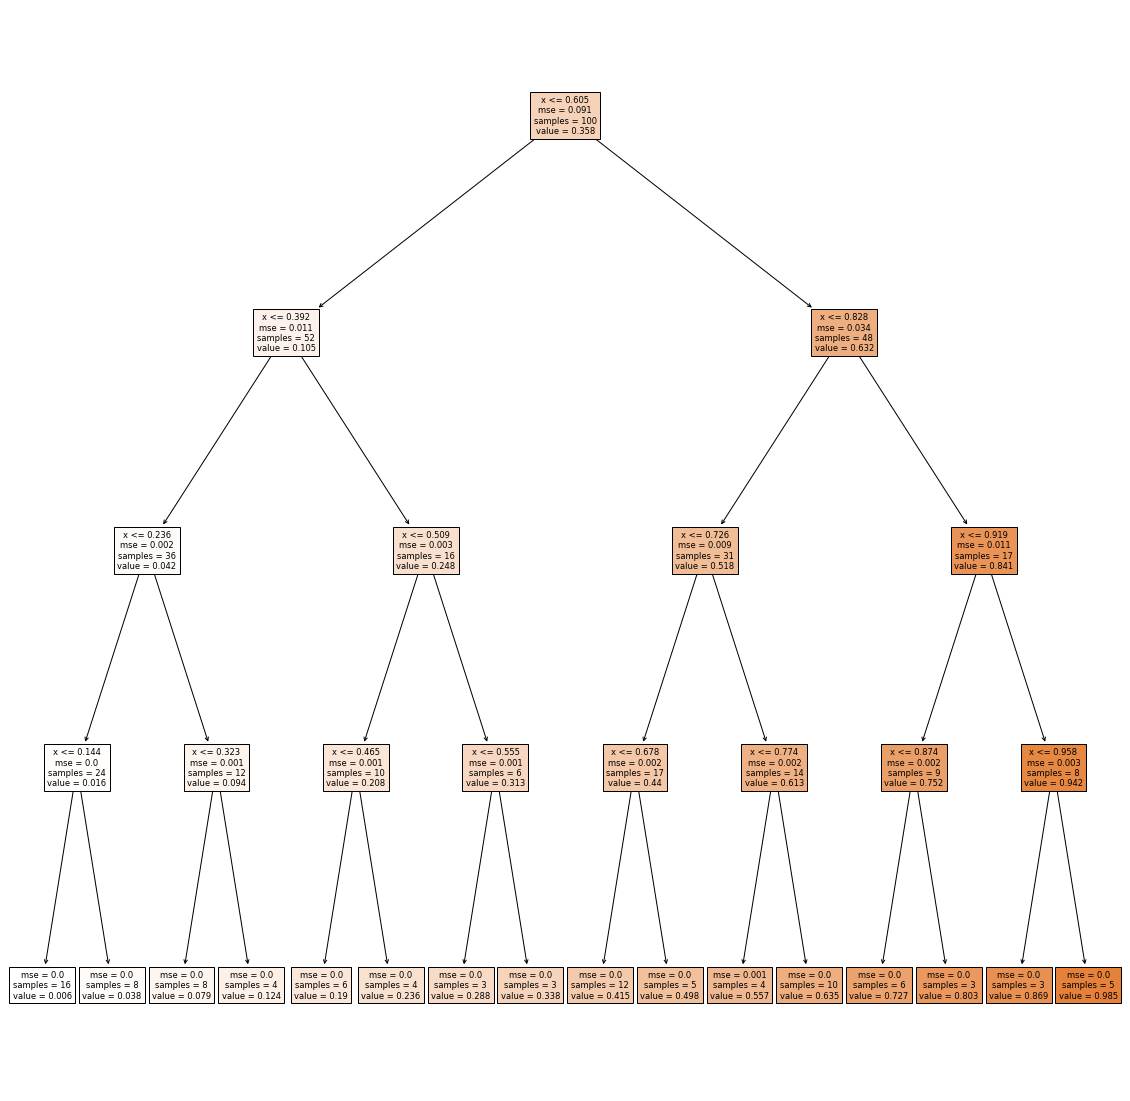

In [14]:
fig = plt.figure(figsize=(20,20))
arvore = tree.plot_tree(tree_reg, 
                   feature_names=['x'],  
                   class_names=['y'],
                   filled=True)

In [15]:
tree_reg.predict([[0.95]])

array([0.86889846])

# Exercises

### What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with 1 million instances?

For a binary tree, the depth is log2(m), so log2(10⁶) that is approximately 20.

### Is a node’s Gini impurity generally lower or greater than its parent’s? Is it generally lower/greater, or always lower/greater?


The Gini coefficient of a child is generally lower than his parents but not always. Sometimes, the increase in Gini impurity is compensated by the other child, so the average is lower.

### If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?


Yes, decreasing the hyperparameter max_depth is a good way to practice regularization and improve fitness. 

### If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

No, a decision tree is not sensible to feature scaling.

### If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?

O1(n*m*log(m)), so: O2(n*10*m*log(10*m)) that is almost 12*O1(n*m*log(m))

### If your training set contains 100,000 instances, will setting presort=True speed up training?

Yes, It will decrease the training time.

### Train and fine-tune a Decision Tree for the moons dataset.

In [16]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=10000, noise=0.4)

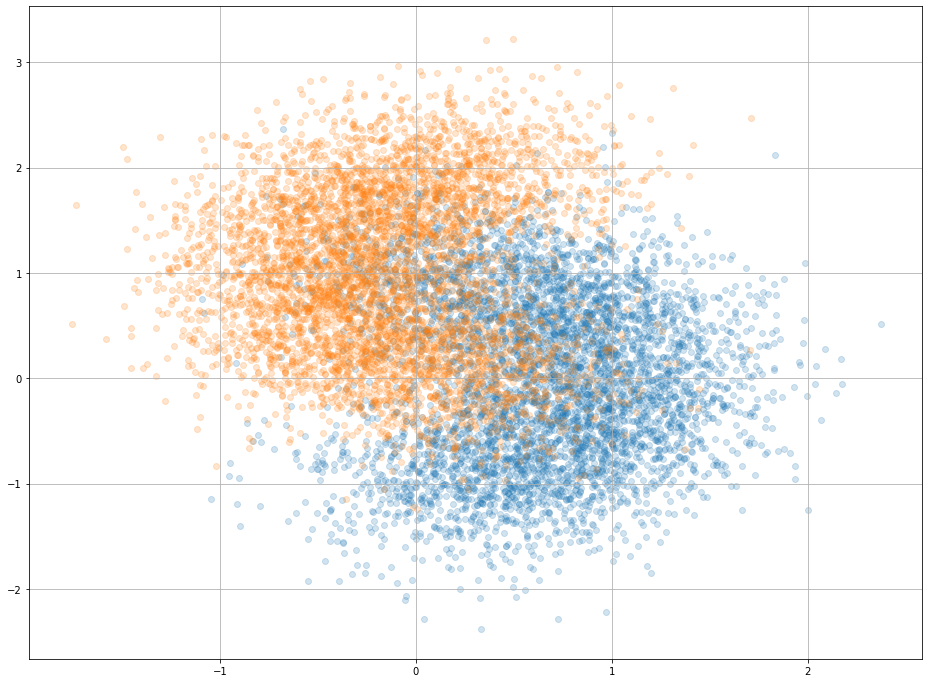

In [26]:
plt.figure(figsize=(16,12))
plt.scatter(x[y==0][:,1],x[y==0][:,0],alpha=0.2)
plt.scatter(x[y==1][:,1],x[y==1][:,0],alpha=0.2)
plt.grid()

In [29]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

param = {
    
        'max_depth': [5, 10, 15, 20, 25, 30, 40, 50, 100],
    
        'min_samples_leaf':[1, 2, 5, 10, 15, 20]
    
}


otimizador = GridSearchCV(clf, param, scoring='accuracy', cv=5)

otimizador.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 2, 5, 10, 15, 20]},
             scoring='accuracy')

In [49]:
otimizador.best_score_

0.8436

In [50]:
otimizador.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)

In [51]:
otimizador.best_estimator_.fit(x_train,y_train)

from sklearn.metrics import accuracy_score

otimizador.best_estimator_.fit(x_train,y_train)

y_pred = otimizador.best_estimator_.predict(x_train)

print(accuracy_score(y_train,y_pred)*100,'%')

85.24000000000001 %


In [52]:
y_pred_test = otimizador.best_estimator_.predict(x_test)

print(accuracy_score(y_test,y_pred_test)*100,'%')

86.28 %


In [53]:
from sklearn.model_selection import ShuffleSplit

In [96]:
from sklearn.model_selection import ShuffleSplit

trees = 1000
instances = 200

sets = []

rs = ShuffleSplit(n_splits=trees, test_size=len(x_train) - instances, random_state=11)

for train_index, test_index in rs.split(x_train):
    x_set_train = x_train[train_index]
    y_set_train = y_train[train_index]
    sets.append((x_set_train, y_set_train))

In [97]:
from sklearn.base import clone

accuracy_scores = []

forest = []

for i in range(1000):
    
    tree = clone(otimizador.best_estimator_)
    
    tree.fit(sets[i][0],sets[i][1])
    
    y_pred = tree.predict(x_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
    forest.append(tree)
    
np.mean(accuracy_scores)*100

80.36724000000001

In [98]:
from scipy.stats import mode

y_pred_forest = np.zeros((1000, len(x_test)))

i=0

for tree in forest:
        
    y_pred_forest[i,:] = tree.predict(x_test)
    i=i+1
    

y_maioria, n_votes = mode(y_pred_forest, axis=0)


In [99]:
y_maioria

array([[0., 0., 0., ..., 1., 1., 0.]])

In [100]:
accuracy_score(y_test, y_maioria.reshape([-1]))*100

83.8